----------------------------------
# HOMEWORK 2 - PROGRAMMING PORTION
#### Genevieve Mortensen 2023-03-18
----------------------------------

Our purpose to programmatically investigate mouse brain cortex scATAC-seq data using methods learned in class.

scATAC-seq stands for single cell Assay of Transposase Accessible Chromatin sequencing. This type of sequencing attempts to capture epigenomic information at a single-cell resolution in an efficient way. The method involves Tn5 transposase nicking open chromatin and ligating adapters to the fragmented chromatin. The resulting library is amplified via PCR and then next-generation sequenced.

scATAC-seq data is known to be sparse and noisy, making data analysis a challenge. So, let's practice!

## 1.1) Download data

Data is downloaded from the following GEO website and unzipped using 7Zip File Manager:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE126074

In [2]:
#Import libraries
import scanpy as sc
import anndata as an
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import episcanpy.api as epi

In [3]:
#Read in downloaded data
counts = an.read_mtx('GSE126074_AdBrainCortex_SNAREseq_chromatin.counts.mtx')
barcodes = pd.read_table('GSE126074_AdBrainCortex_SNAREseq_chromatin.barcodes.tsv', header=None)
peaks = pd.read_table('GSE126074_AdBrainCortex_SNAREseq_chromatin.peaks.tsv', header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'GSE126074_AdBrainCortex_SNAREseq_chromatin.counts.mtx'

The barcodes correspond to the cells and the peaks correspond to the regions of open chromatin, which can help identify regulatory domains. 

Open chromatin indicates that the cell was using the information encoded in that region because it was exposed to the transcriptional and translational cell machinery, indicating some epigenetic importance. 

Chromatin peaks with high counts for a cell barcode mean that the region was highly expressed.

In [ ]:
#Check the data format
print(counts)
counts_t = an.AnnData.transpose(counts)
print(counts_t)
print(len(barcodes))
print(len(peaks))

#Correctly format the data
counts_t.var_names = peaks
counts_t.obs_names = barcodes
counts_t_df = counts_t.to_df()
counts_df = counts_t_df.transpose()

#Show the shapes of the relevant matrices
print(counts.shape)
print(counts_t.shape)
counts = an.AnnData(counts_df)
display(counts_df.head())

AnnData object with n_obs × n_vars = 244544 × 10309
AnnData object with n_obs × n_vars = 10309 × 244544
10309
244544
(244544, 10309)
(10309, 244544)


(09A_GATGCGCGGCTA,)  (09A_GCCATGACCCCA,)  \
(chr1:3005833-3005982,)                  0.0                  0.0   
(chr1:3094772-3095489,)                  0.0                  1.0   
(chr1:3119556-3120739,)                  0.0                  0.0   
(chr1:3121334-3121696,)                  0.0                  0.0   
(chr1:3134637-3135032,)                  0.0                  0.0   

                         (09F_TGGACGATTTGT,)  (09K_GTCTGCCATTAC,)  \
(chr1:3005833-3005982,)                  0.0                  0.0   
(chr1:3094772-3095489,)                  0.0                  0.0   
(chr1:3119556-3120739,)                  0.0                  0.0   
(chr1:3121334-3121696,)                  0.0                  0.0   
(chr1:3134637-3135032,)                  0.0                  0.0   

                         (09F_GGATGAAGAGGG,)  (09C_AGCCCGCCATGG,)  \
(chr1:3005833-3005982,)                  0.0                  0.0   
(chr1:3094772-3095489,)                  0.0                  0.0   
(chr1:3119556-3120739,)                  0.0                  0.0   
(chr1:3121334-3121696,)                  0.0                  0.0   
(chr1:3134637-3135032,)                  0.0                  0.0   

                         (09A_GCCTTCTTCCGT,)  (09F_GTAAAGCCAACA,)  \
(chr1:3005833-3005982,)                  0.0                  0.0   
(chr1:3094772-3095489,)                  0.0                  0.0   
(chr1:3119556-3120739,)                  0.0                  0.0   
(chr1:3121334-3121696,)                  0.0                  0.0   
(chr1:3134637-3135032,)                  0.0                  0.0   

                         (09D_TCCAGGCACGGA,)  (09A_GTAGGAAGCCAC,)  ...  \
(chr1:3005833-3005982,)                  0.0                  0.0  ...   
(chr1:3094772-3095489,)                  0.0                  0.0  ...   
(chr1:3119556-3120739,)                  0.0                  0.0  ...   
(chr1:3121334-3121696,)                  0.0                  0.0  ...   
(chr1:3134637-3135032,)                  0.0                  0.0  ...   

                         (09I_ATTCCCCCGTAA,)  (09G_CGAACCTCGCCC,)  \
(chr1:3005833-3005982,)                  0.0                  0.0   
(chr1:3094772-3095489,)                  0.0                  0.0   
(chr1:3119556-3120739,)                  0.0                  0.0   
(chr1:3121334-3121696,)                  0.0                  0.0   
(chr1:3134637-3135032,)                  0.0                  0.0   

                         (09I_AATGTAATCCTC,)  (09G_TCAATATAGGAA,)  \
(chr1:3005833-3005982,)                  0.0                  0.0   
(chr1:3094772-3095489,)                  0.0                  0.0   
(chr1:3119556-3120739,)                  0.0                  0.0   
(chr1:3121334-3121696,)                  0.0                  0.0   
(chr1:3134637-3135032,)                  0.0                  0.0   

                         (09A_GCAGTTCGCGGC,)  (09F_AACCTCACTGAC,)  \
(chr1:3005833-3005982,)                  0.0                  0.0   
(chr1:3094772-3095489,)                  0.0                  0.0   
(chr1:3119556-3120739,)                  0.0                  0.0   
(chr1:3121334-3121696,)                  0.0                  0.0   
(chr1:3134637-3135032,)                  0.0                  0.0   

                         (09B_CACGTTAGCGCG,)  (09L_ATGTCAGATATA,)  \
(chr1:3005833-3005982,)                  0.0                  0.0   
(chr1:3094772-3095489,)                  0.0                  0.0   
(chr1:3119556-3120739,)                  0.0                  0.0   
(chr1:3121334-3121696,)                  0.0                  0.0   
(chr1:3134637-3135032,)                  0.0                  0.0   

                         (09L_AGTGGCCTCCTT,)  (09L_AGTCGGAACTCT,)  
(chr1:3005833-3005982,)                  0.0                  0.0  
(chr1:3094772-3095489,)                  0.0                  0.0  
(chr1:3119556-3120739,)                  0.0            

                For our dxn matrix, we have d = 244544 features and n = 10309 samples

We will need to transpose the data accordingly and use our nxd matrix when we perform our analysis using EpiScanpy functions because of the way the Anndata class structures data. Please see HW1 for the in-depth explanation.

## 1.2) Analyze data using EpiScanpy
Following the Buenrostro tutorial and the EpiScanpy API (respectively referenced below), we will unpack the data and visualize findings.

https://nbviewer.org/github/colomemaria/epiScanpy/blob/master/docs/tutorials/Buenrostro_PBMC_data_processing.ipynb

https://episcanpy.readthedocs.io/en/latest/api/index.html

We don't have metadata associated with this group of data, so we can move on to preprocessing. Keep in mind that any analysis covered in the tutorial which must use metadata will not be performed in this experimental analysis.

### Preprocessing

In [ ]:
#Check to see if the data is binary, then binarize it
print(np.max(counts_t.X))
epi.pp.binarize(counts_t)
print(np.max(counts_t.X))


16.0
1.0


In [ ]:
#Perform filtering of cells with no features and features with no cells
epi.pp.filter_cells(counts_t, min_features=1)
epi.pp.filter_features(counts_t, min_cells=1)
print(counts_t)

AnnData object with n_obs × n_vars = 10309 × 244538
    obs: 'nb_features'
    var: 'n_cells'


### Quality Control

In [ ]:
#log the features for visualization
counts_t.obs['log_nb_features'] = [np.log10(x) for x in counts_t.obs['nb_features']]
counts_t

AnnData object with n_obs × n_vars = 10309 × 244538
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells'

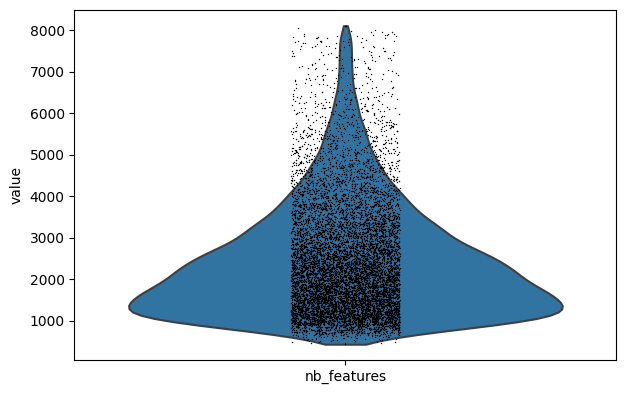

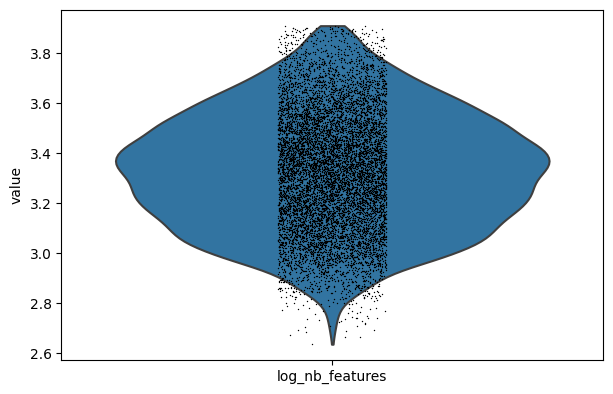

In [ ]:
#Visualize with a violin plot to check distribution and noise
epi.pl.violin(counts_t, ['nb_features'])
epi.pl.violin(counts_t, ['log_nb_features'])

The data looks okay in terms of noise and distribution. We need to set a minimum number of cells to keep and features as well. 

Let's look at the distributions which are created when we hypothetically remove some minima of features and cells.


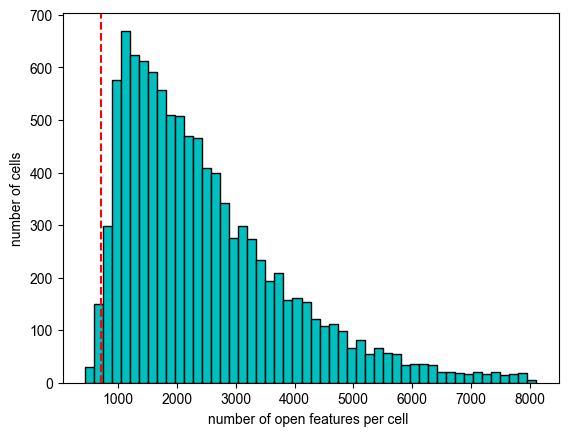

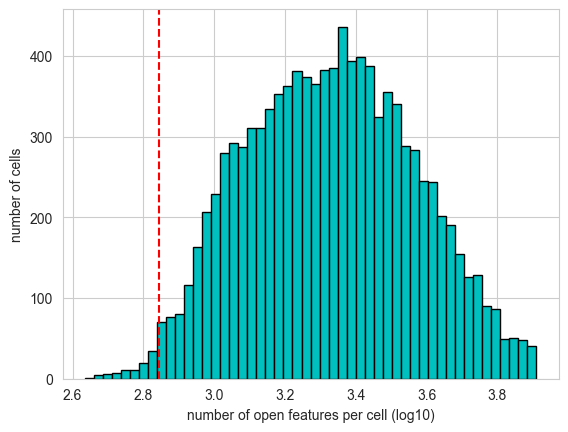

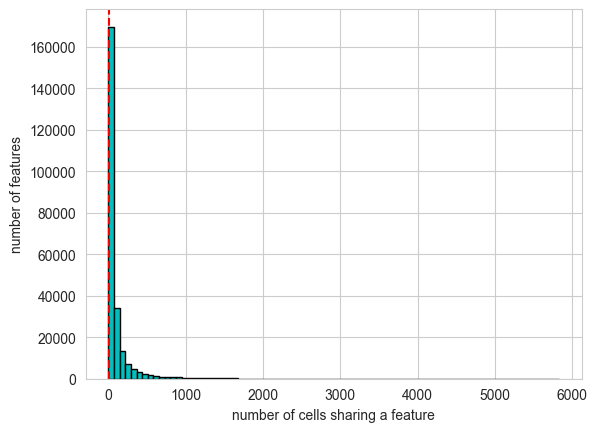

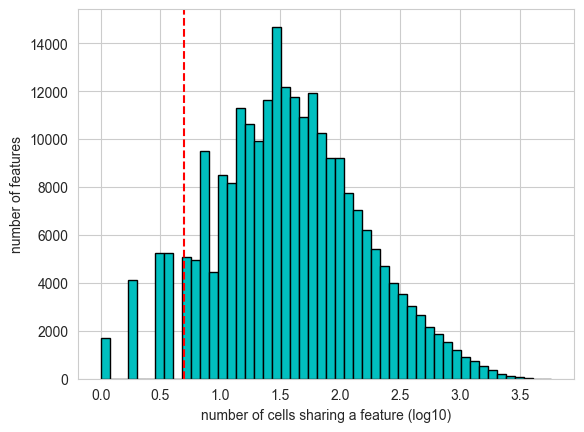

In [ ]:
min_features = 700
epi.pp.coverage_cells(counts_t, binary=True, log=False, bins=50,
               threshold=min_features, save='testing_bulk_peaks_coverage_cells.png')
epi.pp.coverage_cells(counts_t, binary=True, log=10, bins=50,
               threshold=min_features, save='testing_bulk_peaks_coverage_cells_log10.png')

min_cells = 5
epi.pp.coverage_features(counts_t, binary=True, log=False, 
                        threshold=min_cells, save='testing2_bulk_peaks_coverage_peaks.png')
epi.pp.coverage_features(counts_t, binary=True, log=True, 
                        threshold=min_cells, save='testing2_bulk_peaks_coverage_peaks_log10.png')


For our features, we'd want a normally distributed plot capturing most of our data. For our cells, we'd expect a right-skewed graph capturing most of our data. 

Looks like we can filter at our experimentally found minima.

In [ ]:
#Filter the data
epi.pp.filter_cells(counts_t, min_features=min_features)
epi.pp.filter_features(counts_t, min_cells=min_cells)

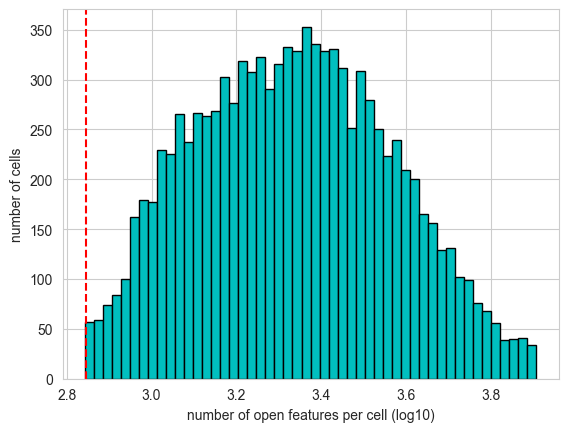

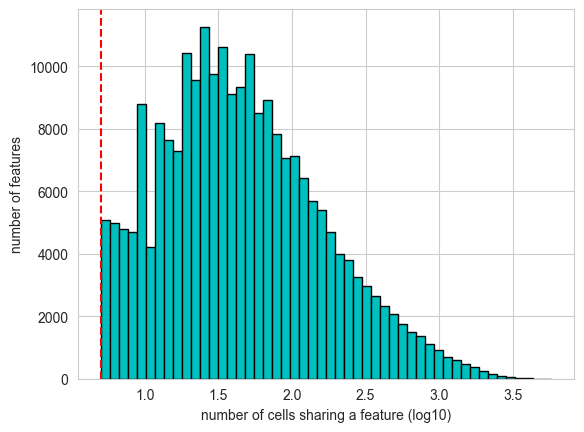

In [ ]:
#Visualize the distribution
epi.pp.coverage_cells(counts_t, binary=True, log='log10', bins=50, threshold=min_features)
epi.pp.coverage_features(counts_t, binary=True, log='log10', bins=50, threshold=min_cells)

Now, we need to identify the most variable features. 

EpiScanpy will give us the a plot showing a variability score for our features. We need to select a cutoff after the elbow of the distribution oof variability scores.

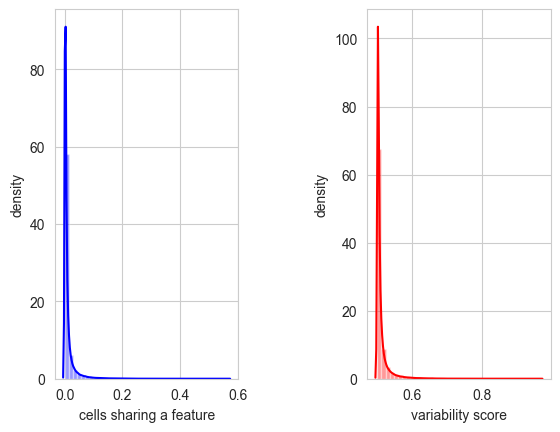

In [ ]:
epi.pp.cal_var(counts_t)

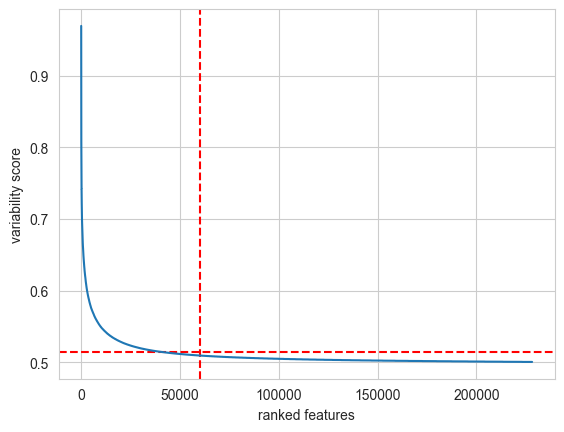

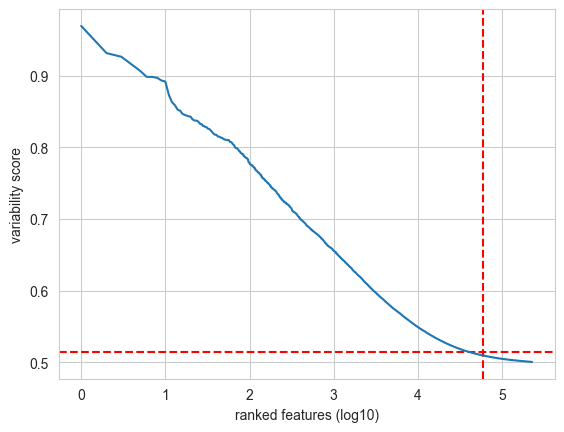

In [ ]:
min_score_value=0.515
#Pick a log10 feature value
nb_feature_selected=60000

#Plot the cut-offs
epi.pl.variability_features(counts_t,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_bonemarrow_peakmatrix.png')

epi.pl.variability_features(counts_t,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_bonemarrow_peakmatrix_log10.png')


Great, we have chosen cutoff's just around the elbows. Now we can save the raw data and preprocess the data such that we only retain the highly variable features for dimension reduction and cluster identification.

In [ ]:
#Save the raw data
counts_t.raw = counts_t

In [ ]:
#Select only variable features
counts_t = epi.pp.select_var_feature(counts_t, nb_features=nb_feature_selected, show=False, copy=True)

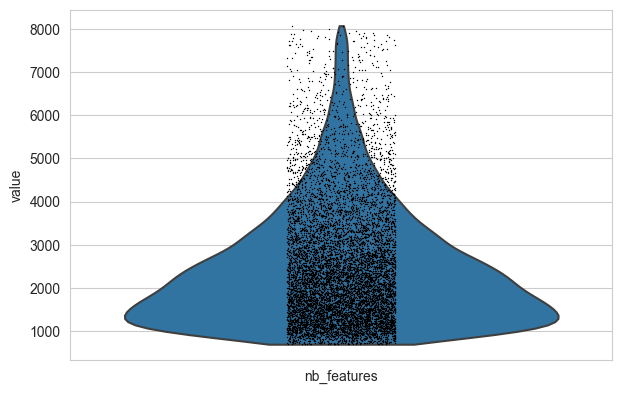

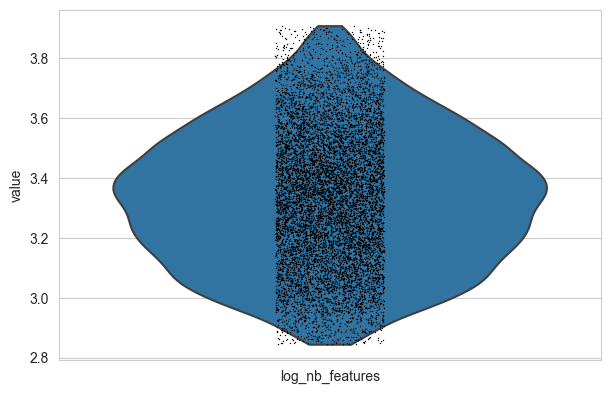

In [ ]:
#Visualize data
epi.pl.violin(counts_t, ['nb_features'])
epi.pl.violin(counts_t, ['log_nb_features'])

Our data looks to have no outliers from the central distributions, so we don't need to filter anymore. Let's move on!

### Normalization

Before normalizing, we can look at the binary matrix UMAP. We need to compute the PCA, UMAP neighbors, and TSNE embeddings.

We don't have metadata associated with this dataset, so we cannot visualize cell types like the tutorial does.

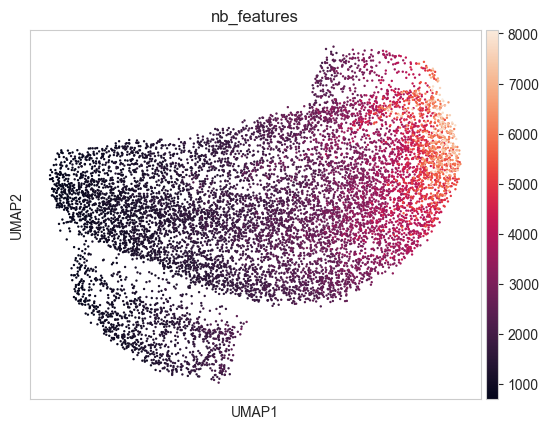

In [ ]:
epi.pp.lazy(counts_t)
sc.pl.umap(counts_t, color=['nb_features'], wspace=0.3)

In [ ]:
#Save the binary matrix
counts_t.layers['binary'] = counts_t.X.copy()

In [ ]:
#Perform the normalization and save it
epi.pp.normalize_total(counts_t)
counts_t.layers['normalized'] = counts_t.X.copy()

In [ ]:
counts_t

AnnData object with n_obs × n_vars = 10202 × 60213
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'pca', 'neighbors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'normalized'
    obsp: 'distances', 'connectivities'

                Our matrix now has 10202 cells and 60213 features

Great! Now let's visualize everything

### Visualization

Let's take a look at our normalized and dimensionally reduced data.

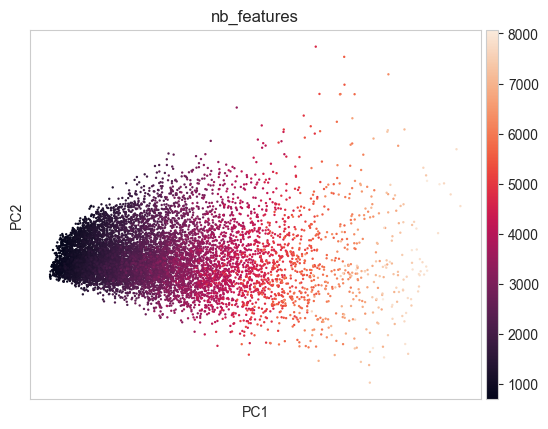

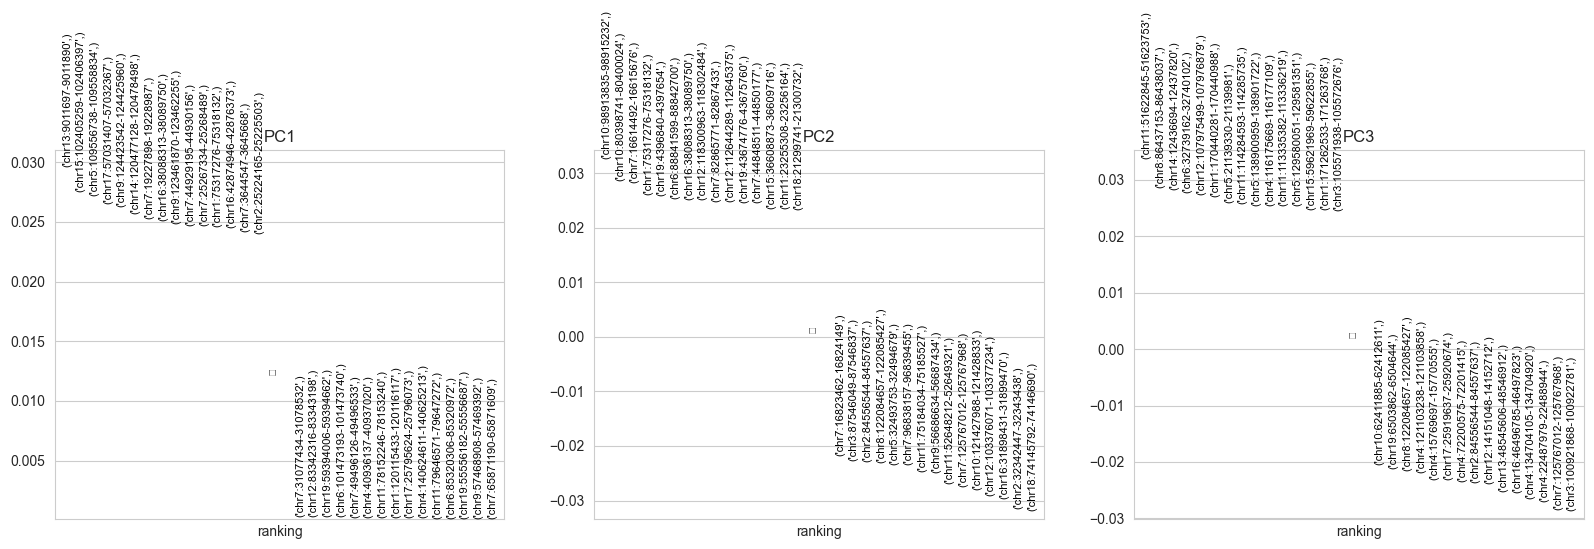

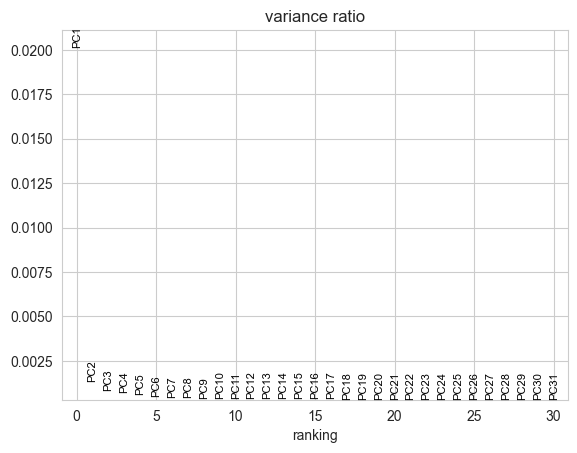

In [ ]:
epi.pl.pca_overview(counts_t, color=['nb_features'])

The first plot shows that most of the variation retained by the first two principal components, but clusters poorly.

The second plot shows rankings of each feature to the variation of each principal component.

The third plot shows the rankings of each principal component to the variation of the dataset.

Now that we've checked out the variation in the non-normalized data, let's do dimension reduction on the normalized data and visualize that.

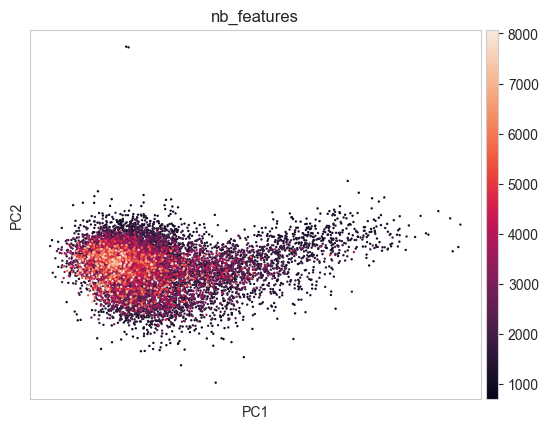

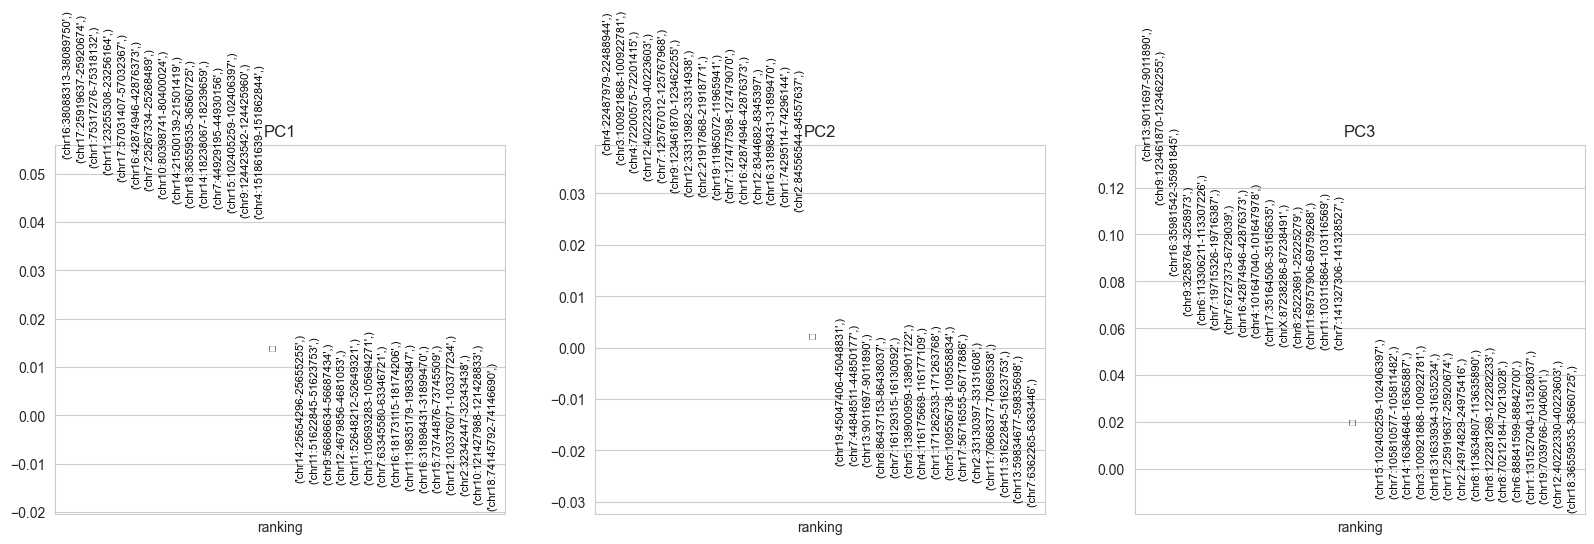

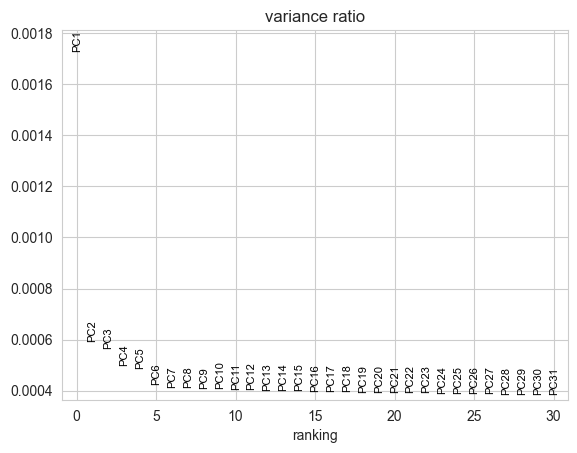

In [ ]:
#Perform dimension reduction on normalized data
epi.pp.lazy(counts_t)
epi.pl.pca_overview(counts_t, color=['nb_features'])

Now we are getting somewhere! We see better clustering of data. 

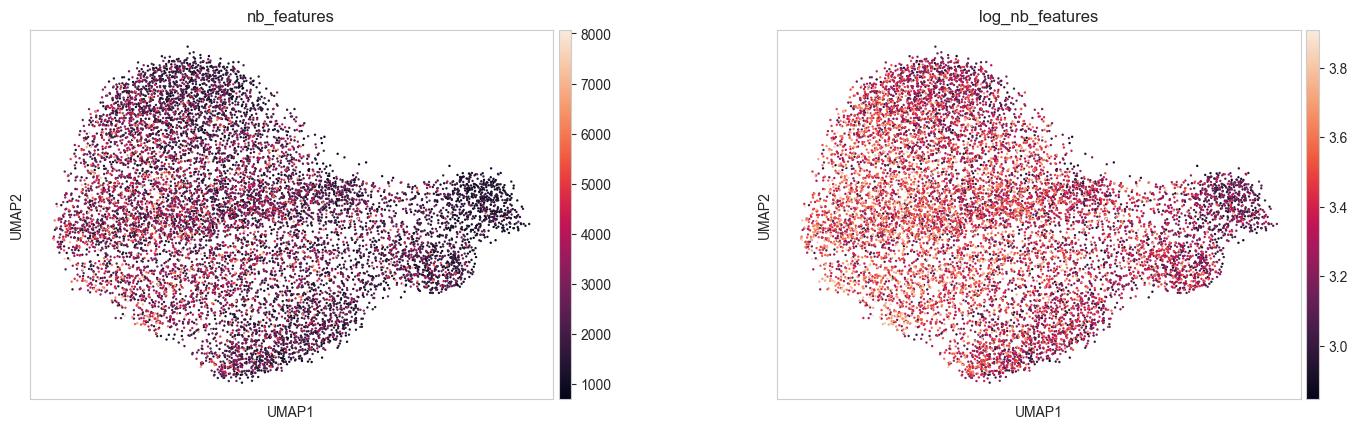

In [ ]:
epi.pl.umap(counts_t, color=['nb_features', 'log_nb_features'], wspace=0.3)

We still don't see great clusters, though, and the number of features recovered per cell vary significantly. Let's log transform to help massage the data into something more workable for identifying clusters, then perform dimension reduction again, then plot the data again.

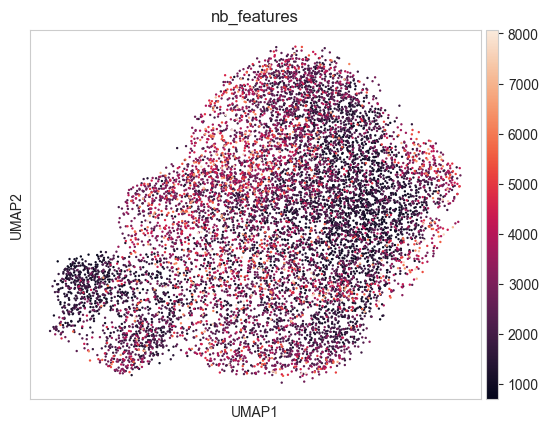

In [ ]:
epi.pp.log1p(counts_t)
epi.pp.lazy(counts_t)
epi.pl.umap(counts_t, color=['nb_features'], wspace=0.3)

### Clustering

Let's do four different kinds of clustering and then compare them.

We need to look at the resolution we need to obtain a certain number of clusters. At a resolution >= 1, we get 7 clusters. We want to retain a reasonable number of clusters. We will use this to set the number of clusters for our kmeans and heirarchal clustering algorithm plotting, which require a positional argument about the number of clusters.

In [ ]:
epi.tl.getNClusters(counts_t, n_cluster=7)

step 0
got 11 at resolution 1.5
step 1
got 5 at resolution 0.75
step 2
got 8 at resolution 1.125
step 3
got 6 at resolution 0.9375
step 4
got 7 at resolution 1.03125


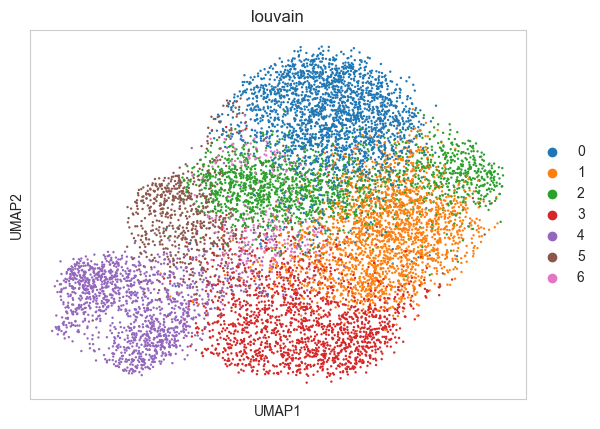

In [ ]:
#Louvain clustering
epi.tl.louvain(counts_t)
epi.pl.umap(counts_t, color=['louvain'], wspace=0.3)

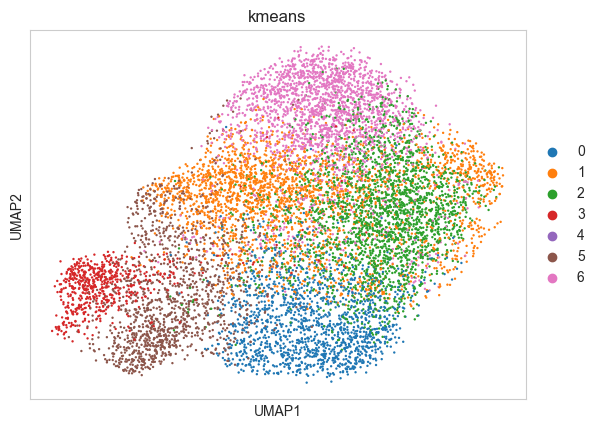

In [ ]:
#Kmeans clustering
epi.tl.kmeans(counts_t, num_clusters = 7)
epi.pl.umap(counts_t, color=['kmeans'])

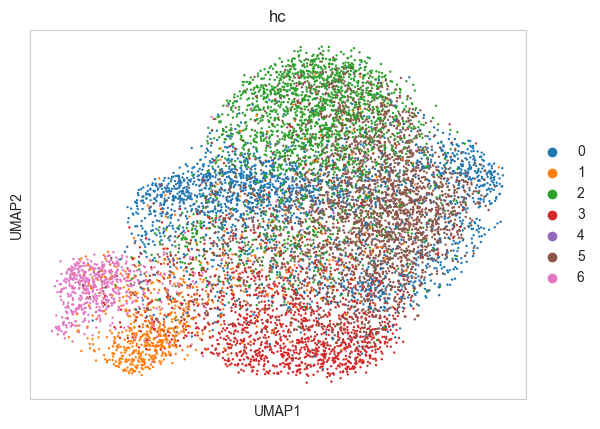

In [ ]:
#Hierarchical clustering
epi.tl.hc(counts_t, num_clusters=7)
epi.pl.umap(counts_t, color=['hc'])

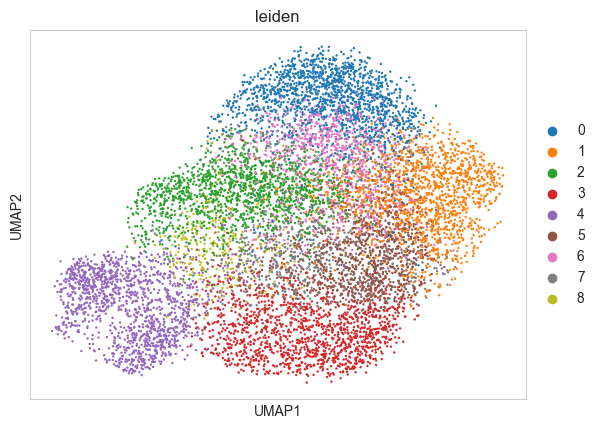

In [ ]:
#Leiden clustering
epi.tl.leiden(counts_t)
epi.pl.umap(counts_t, color=['leiden'])

In [1]:
#Compare all of them side-by-side
epi.pl.umap(counts_t, color=['louvain', 'kmeans', 'hc', 'leiden'])

NameError: name 'epi' is not defined

Louvain clustering appears to be the most distinct, but we should run some quantitative metrics to be sure. We don't have metadata associated with the clustering, so it is possible that the following results may be conflicting.

### Comparison of clustering

We need to check to see which clustering algorithm was the best. First, we will use Adjusted Rand Index, which computes the similiarty of clusters by comparing cells which are assigned to the same cluster. Then, we will use a Homogeneity score, which scores more highly for clustering algorithms where cells have the same ground truth labels. Lastly, we will compute the Adjusted Mutual Information, which measures similarity between two labels of data for the same information while accounting for chance.

For all 3 methods, the closer the score is to 1, the better the quality of the clustering.

In [ ]:
#Compute Adjusted Rand Index
print('louvain:\t', epi.tl.ARI(counts_t, 'louvain', 'nb_features'))
print('kmeans:\t', epi.tl.ARI(counts_t, 'kmeans', 'nb_features'))
print('hc:\t', epi.tl.ARI(counts_t, 'hc', 'nb_features'))
print('leiden:\t', epi.tl.ARI(counts_t, 'leiden', 'nb_features'))

louvain:	 9.44221775668493e-05
kmeans:	 0.00033838252260181303
hc:	 0.00035253837856731595
leiden:	 8.067529933180501e-05


In [ ]:
#Compute homogeneity score
print('louvain:\t', epi.tl.homogeneity(counts_t, 'louvain', 'nb_features'))
print('kmeans:\t', epi.tl.homogeneity(counts_t, 'kmeans', 'nb_features'))
print('hc:\t', epi.tl.homogeneity(counts_t, 'hc', 'nb_features'))
print('leiden:\t', epi.tl.homogeneity(counts_t, 'leiden', 'nb_features'))

louvain:	 0.5543582945706734
kmeans:	 0.5977547711329543
hc:	 0.6068700339763116
leiden:	 0.5763861456910131


In [ ]:
#Compute Adjusted Mutual Information
print('louvain:\t', epi.tl.AMI(counts_t, 'louvain', 'nb_features'))
print('kmeans:\t', epi.tl.AMI(counts_t, 'kmeans', 'nb_features'))
print('hc:\t', epi.tl.AMI(counts_t, 'hc', 'nb_features'))
print('leiden:\t', epi.tl.AMI(counts_t, 'leiden', 'nb_features'))

louvain:	 0.010252407546443833
kmeans:	 0.03389475327575616
hc:	 0.036822245349537555
leiden:	 0.007135786534343272


                Quantitatively, it appears heirarchal clustering was the best at clustering the features.
                
                Qualitatively, it appears Louvain clustering was the best. 
                
                What do we trust?

These conflicting results are because we don't have any metadata associated with our dataset, so the clustering is only dependent on the raw features and not on some relevant categorization. Therefore, the metrics we calculated are actually not as informative as they could be. 

This naive approach isn't helpful in a biological sense, so we can use our qualitative skills to perform more analysis and make sense of our data.

In [ ]:
epi.tl.rank_features(counts_t, 'louvain', omic='ATAC')
#We already logarithmized the data, so we can ignore the warning.

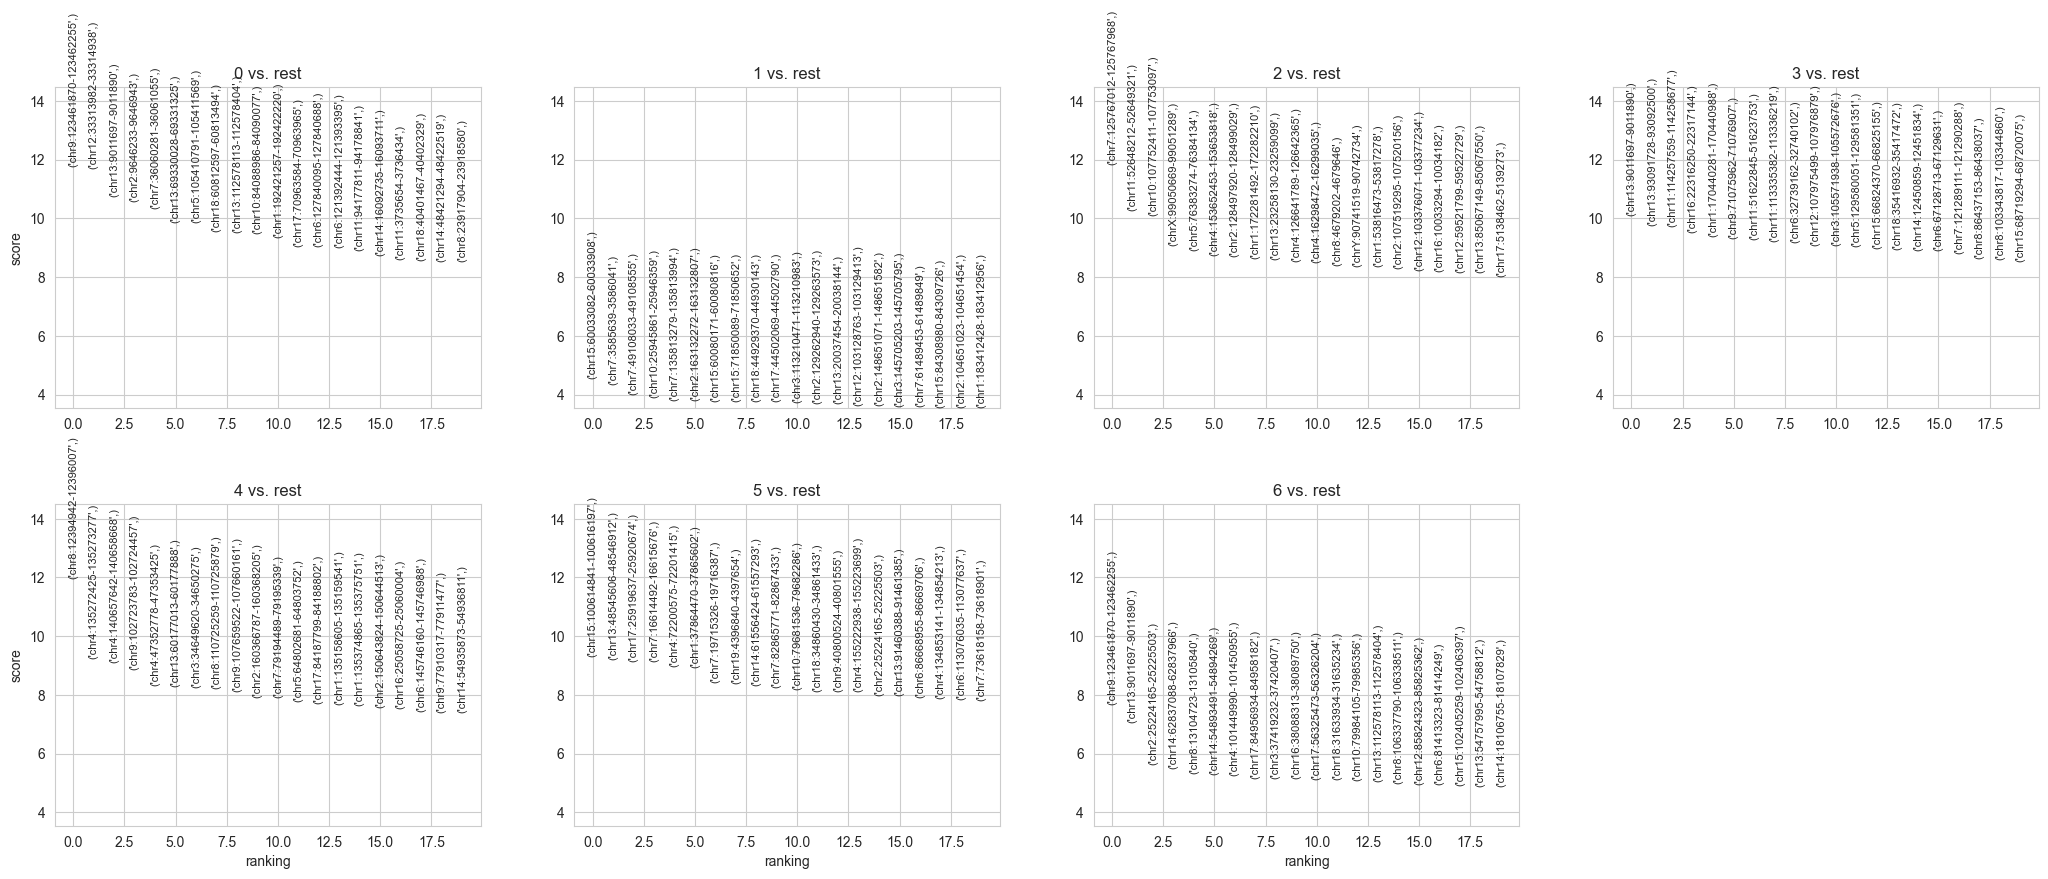

In [ ]:
#Visualize clusters with feature rankings
epi.pl.rank_feat_groups(counts_t)

Ultimately, it appears we have two clusters- 0 and 6- which have similar features (e.g. chr9: genomic-coordinates) as each other with similar contributions to the characterization of those clusters, meaning they are indistinct clusters. This indicates our data could be clustered better because these two clusters are so similar. Converesely, cluster 1 is not well characterized by any of the features which comprise it, showing that these features only belong in this cluster because they could not belong in any other, indicating a cluster where the relation of features is weak. 

On the other hand, clusters 2, 3, 4, and 5 appear distinct and well characterized by their respective features given their high ranking. This means that we can rely on the Louvain algorithm's distinction between the clusters and therefore the features, indicating the regions are all associated with distinctly different regulatory purposes within the cell.